# Problem Statement: Develop a predictive model to estimate the price of a vehicle based on the provided features.

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\Kuldeep'

In [5]:
os.chdir("C:/Users/Kuldeep/Desktop/cdac mumbai new")

In [6]:
df=pd.read_csv("vehicles.csv")    #read the file

In [7]:
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [8]:
df.shape

(258888, 26)

In [9]:
df.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [11]:
#check for null vlaues
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [12]:
df=df.drop(['details','member_since'],axis=1)

In [13]:
df.shape

(258888, 24)

In [14]:
#dropping all remaining null values
df=df.dropna()

In [15]:
df.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [16]:
df['category'].unique()    #checking of all unique category

array(['Auto Parts & Accessories', 'Cars', 'Auto Services', 'Rentals',
       'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [17]:
df1=df.drop(df[(df['category']=='Auto Parts & Accessories') | (df['category']=='Auto Services') | (df['category']=='Rentals')].index)


#we can see there are 3 categories in that auto partes and accessories ,auto services and rentals are not vehicals so 
# we need to drop those data 

In [18]:
df1['category'].unique()  # after cleaning that data 

array(['Cars', 'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [19]:
df1['price'].head()   # we can see our value are in Rs 9000 these types of form so we need to convert  these into float

31      Rs 22,000,000
1349    Rs 14,500,000
1701    Rs 10,500,000
1702     Rs 6,500,000
1917    Rs 11,500,000
Name: price, dtype: object

In [20]:
df1['price'] = df1['price'].str.replace('Rs ', '').str.replace(',', '')
df1['price'] = df1['price'].apply(lambda x: np.nan if x == 'Negotiable' else float(x))

In [21]:
df=df.dropna() #again dropped null values

In [22]:
df.shape

(246050, 24)

In [23]:
df2=df1.drop(['ad_title','ad_description','parent_category','geo_region','location','slug','title','area','type','timestamp','posted_date','deactivation_date','user'],axis=1)

# droped all irrelavent columns and not related data 

In [24]:
df2['properties'].unique()   # checked properties column

array(["{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Trim / Edition': 'Rexton Ultimate d/ca', 'Year of Manufacture': '2019', 'Condition': 'New', 'Transmission': 'Tiptronic', 'Body type': 'SUV / 4x4', 'Fuel type': 'Diesel', 'Engine capacity': '2,200 cc', 'Mileage': '0 km'}",
       "{'Brand': 'Toyota', 'Model': 'CHR', 'Year of Manufacture': '2017', 'Condition': 'Reconditioned', 'Transmission': 'Tiptronic', 'Body type': 'CoupÃ©/Sports', 'Fuel type': 'Petrol', 'Engine capacity': '1,200 cc', 'Mileage': '9,000 km'}",
       "{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / Edition': 'Axio', 'Year of Manufacture': '2015', 'Condition': 'Reconditioned', 'Transmission': 'Automatic', 'Body type': 'Saloon', 'Fuel type': 'Hybrid', 'Engine capacity': '1,500 cc', 'Mileage': '24,000 km'}",
       ...,
       "{'Brand': 'Toyota', 'Model': 'Allion', 'Trim / Edition': '260', 'Year of Manufacture': '2009', 'Condition': 'Used', 'Transmission': 'Automatic', 'Body type': 'Saloon', 'Fuel type': 'Petrol', 'Engine 

In [25]:
Condition = []
Brand = []
Model = []
Mileage = []


for i in range(df2.shape[0]):
    dict_converted = ast.literal_eval(df2.iloc[i][-1])
    Condition.append(dict_converted['Condition'])

    if 'Brand' not in dict_converted:
        Brand.append('NaN')
    else:
        Brand.append(dict_converted['Brand'])

    if 'Model' not in dict_converted:
        Model.append('NaN')
    else:
        Model.append(dict_converted['Model'])

    if 'Mileage' not in dict_converted:
        Mileage.append(0)
    else:
        Mileage.append(dict_converted['Mileage'])

# in this we collected all relavent data present in the "properties" column

C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_17624\3849696138.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dict_converted = ast.literal_eval(df2.iloc[i][-1])


In [26]:
df2['Condition']=Condition
df2['Brand']=Brand
df2['Mileage']=Mileage
df2['Model']=Model

#created new columns with all those value 

In [27]:
df2

,price,category,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,Condition,Brand,Mileage,Model
31,22000000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Tr...",New,Ssang Yong,0 km,Rexton
1349,14500000.0,Cars,False,False,False,True,False,False,True,premium,"{'Brand': 'Toyota', 'Model': 'CHR', 'Year of M...",Reconditioned,Toyota,"9,000 km",CHR
1701,10500000.0,Cars,False,False,False,True,False,False,True,premium,"{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / E...",Reconditioned,Toyota,"24,000 km",Axio
1702,6500000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Daihatsu', 'Model': 'Atrai Wagon', ...",Reconditioned,Daihatsu,"55,000 km",Atrai Wagon
1917,11500000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Mercedes Benz', 'Model': 'C180', 'Y...",Used,Mercedes Benz,"137,000 km",C180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258881,12985000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'CHR', 'Trim / Ed...",Used,Toyota,"43,000 km",CHR
258883,1030000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",Used,Nissan,"140,000 km",March
258884,3550000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",Used,Toyota,"219,000 km",Allion
258886,7250000.0,Cars,False,False,False,True,False,False,False,premium,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",Used,Toyota,"30,000 km",Roomy


In [28]:
df2=df2.drop(['properties'],axis=1)   # droped properties column because we collected data from proeprties

In [29]:
df2

,price,category,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,Condition,Brand,Mileage,Model
31,22000000.0,Cars,False,False,False,True,False,False,True,plus,New,Ssang Yong,0 km,Rexton
1349,14500000.0,Cars,False,False,False,True,False,False,True,premium,Reconditioned,Toyota,"9,000 km",CHR
1701,10500000.0,Cars,False,False,False,True,False,False,True,premium,Reconditioned,Toyota,"24,000 km",Axio
1702,6500000.0,Cars,False,False,False,True,False,False,True,plus,Reconditioned,Daihatsu,"55,000 km",Atrai Wagon
1917,11500000.0,Cars,False,False,False,True,False,False,True,plus,Used,Mercedes Benz,"137,000 km",C180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258881,12985000.0,Cars,False,False,False,False,False,False,False,free,Used,Toyota,"43,000 km",CHR
258883,1030000.0,Cars,False,False,False,False,False,False,False,free,Used,Nissan,"140,000 km",March
258884,3550000.0,Cars,False,False,False,False,False,False,False,free,Used,Toyota,"219,000 km",Allion
258886,7250000.0,Cars,False,False,False,True,False,False,False,premium,Used,Toyota,"30,000 km",Roomy


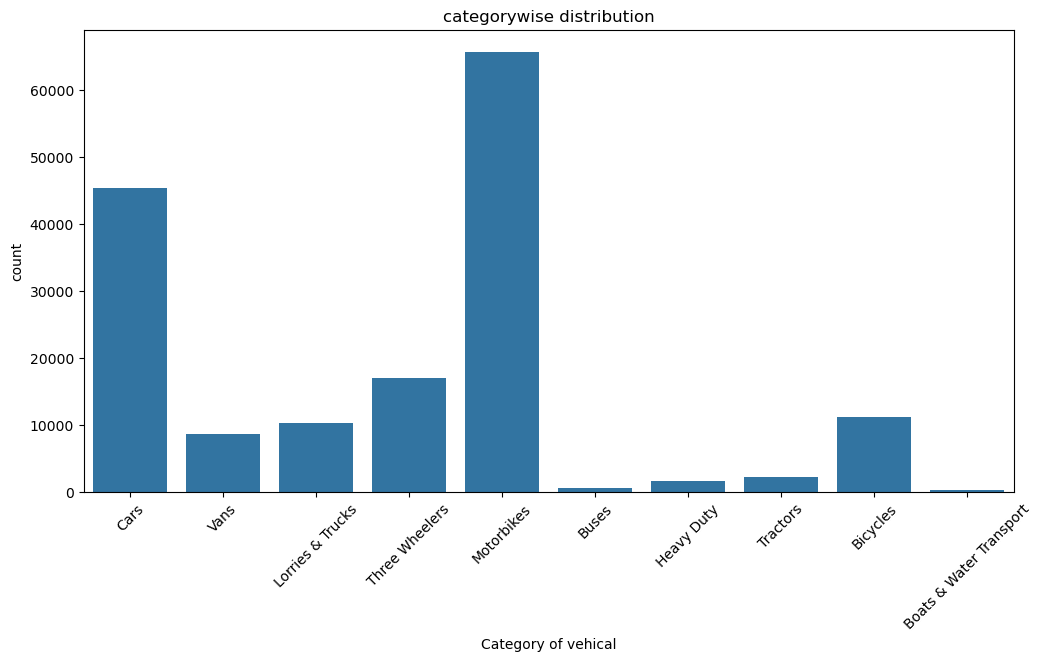

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=df2)
plt.title("categorywise distribution")
plt.xlabel("Category of vehical")
plt.ylabel("count")
plt.xticks(rotation=45) 
plt.show()

In [31]:
# from above plot we got idea about data distribution according to its category and we can observe we have maximum mumber od vehicals are motorbikes
 

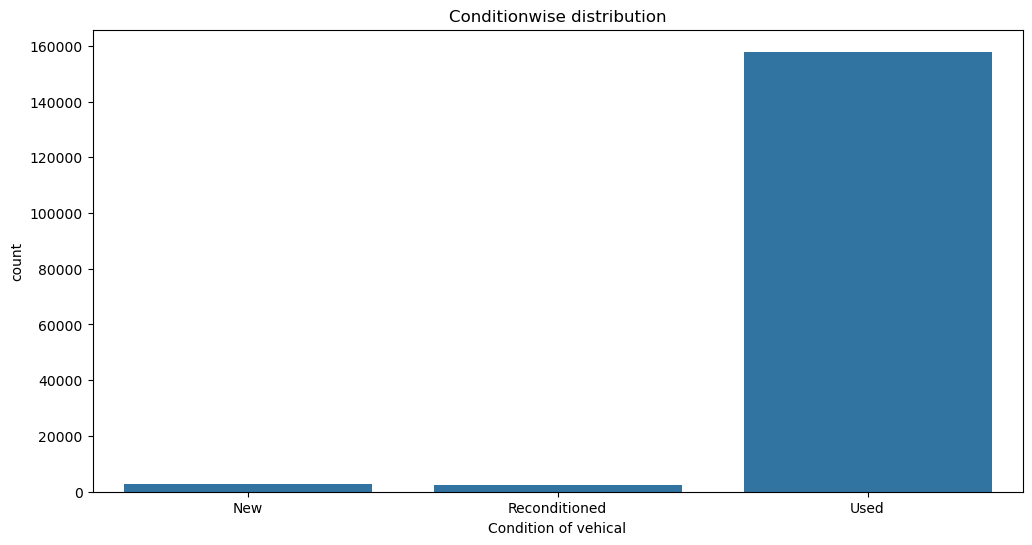

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='Condition',data=df2)
plt.title("Conditionwise distribution")
plt.xlabel("Condition of vehical")
plt.ylabel("count")
plt.show()

In [33]:
# from above graph we can observe there maximum vehicals are used vehicals 

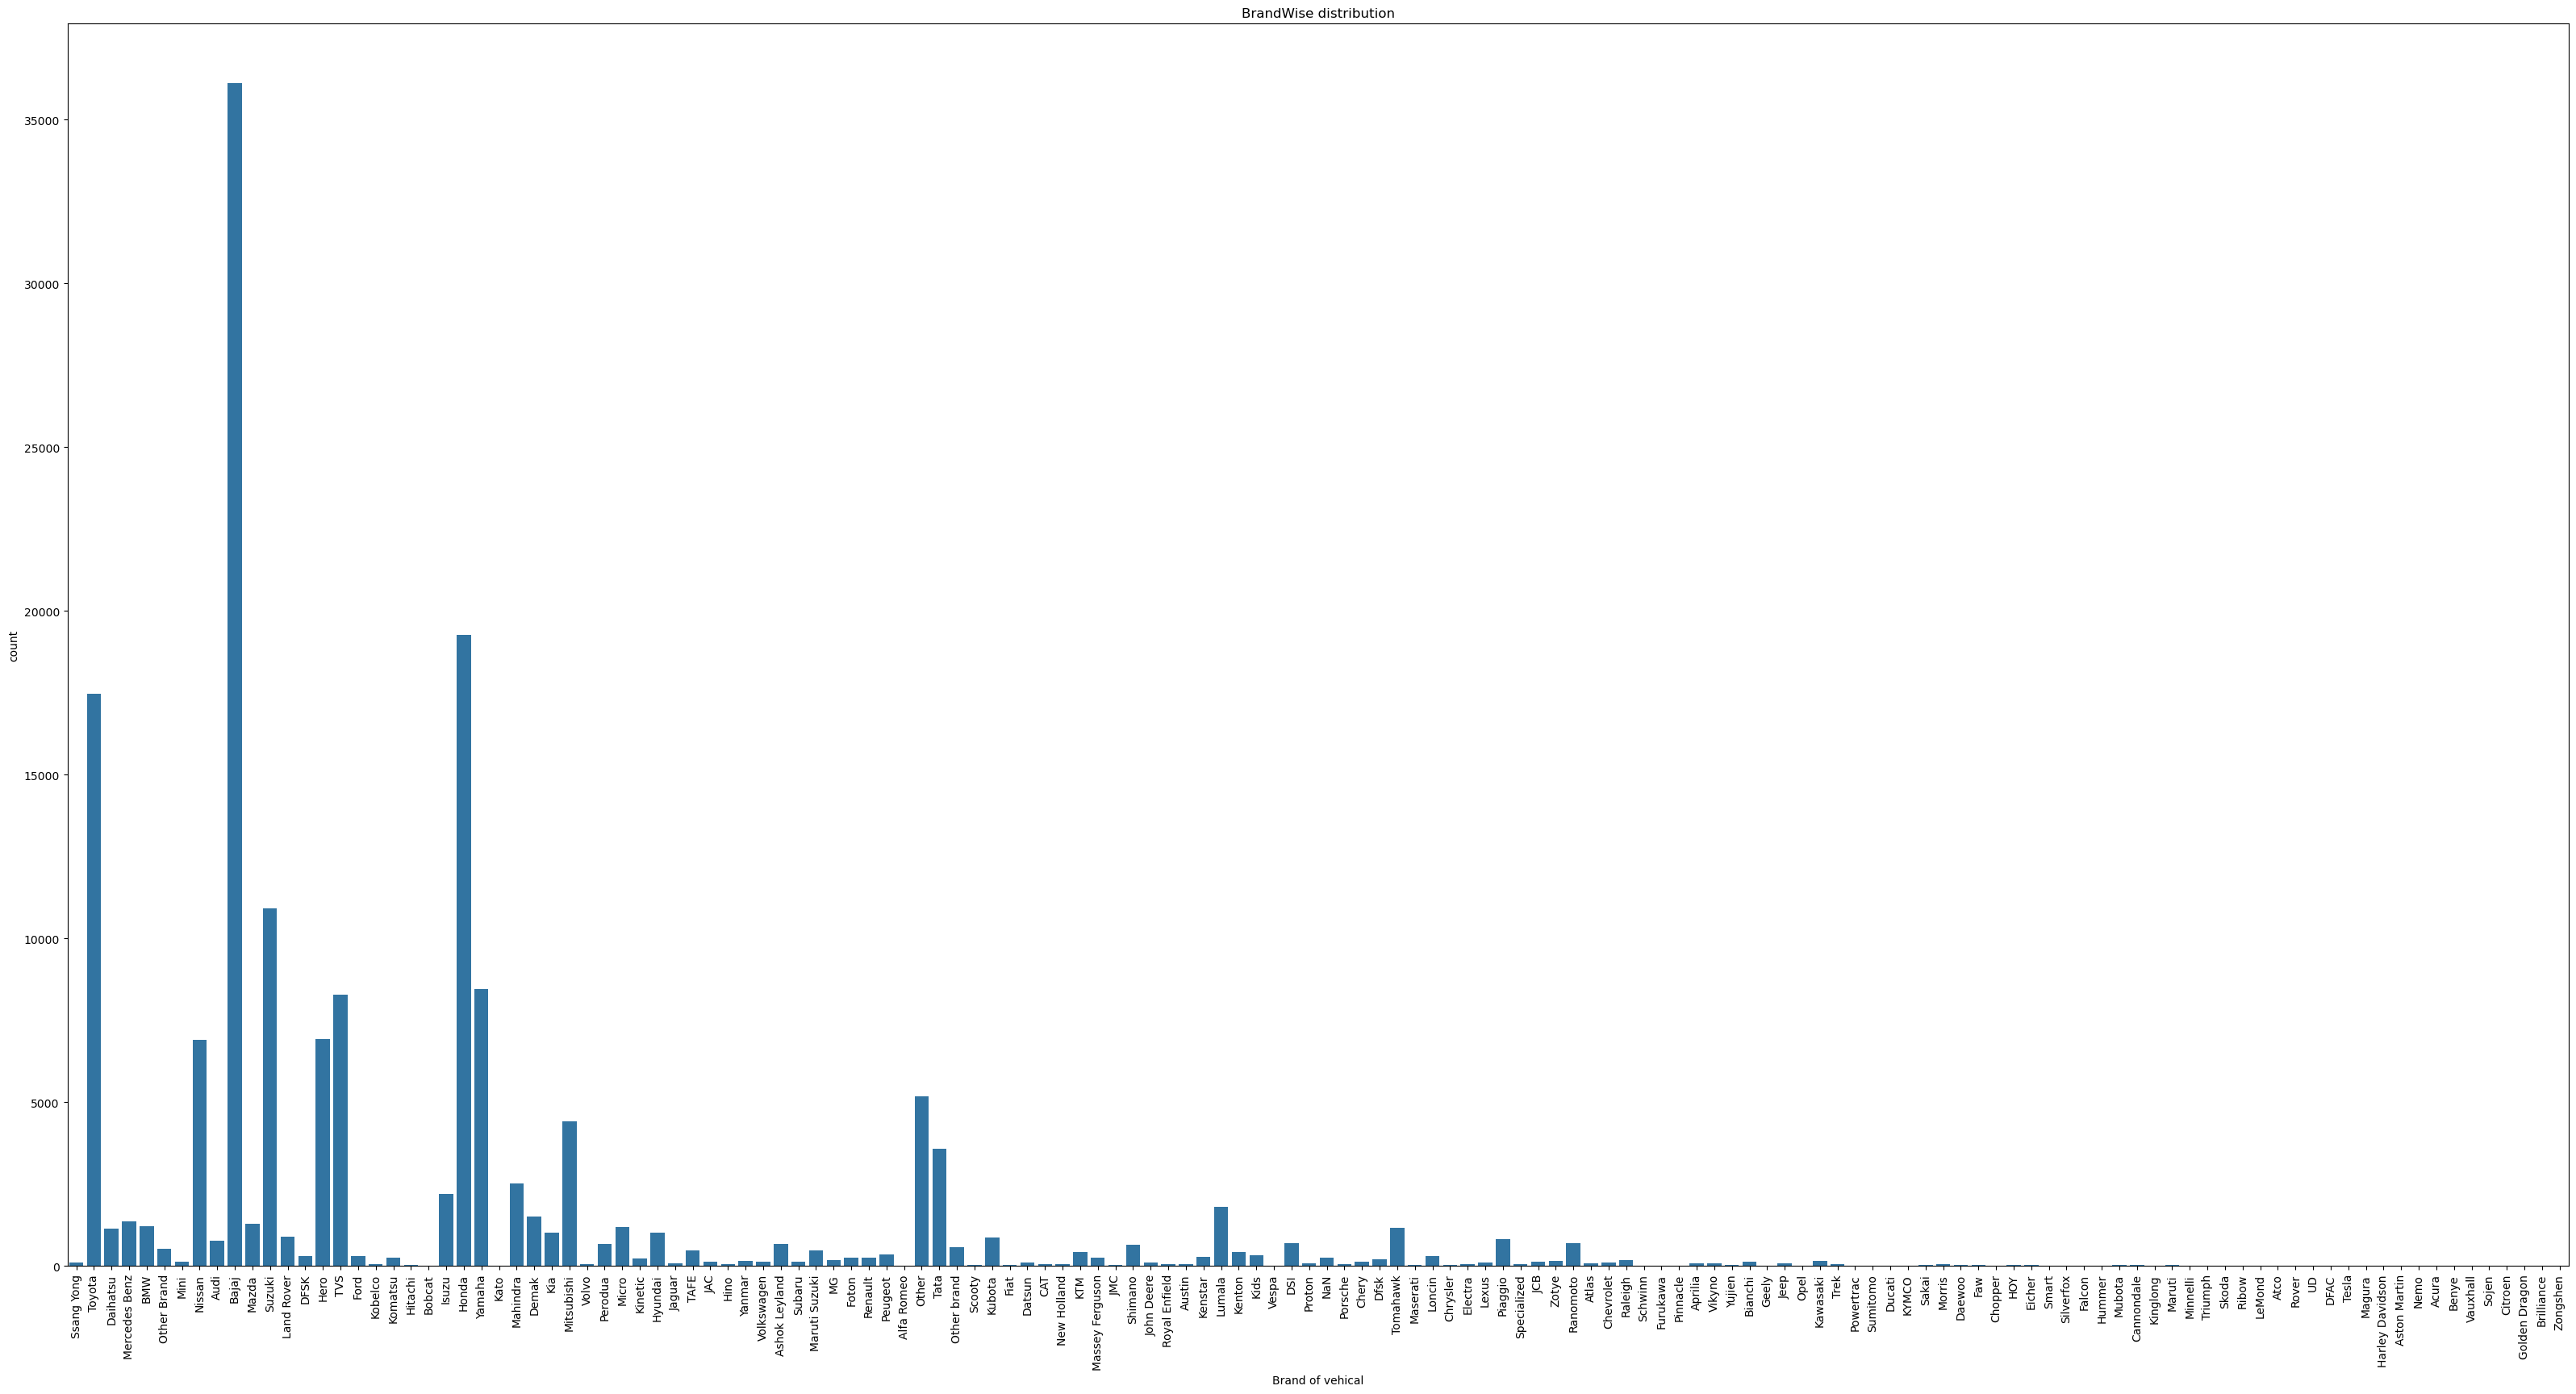

In [34]:
plt.figure(figsize=(40,20))
sns.countplot(x='Brand',data=df2)
plt.title("BrandWise distribution")
plt.xlabel("Brand of vehical")
plt.ylabel("count")

plt.xticks(rotation=90) 
plt.show()

In [35]:
df2['Mileage'] = df2['Mileage'].str.replace(' km', '').str.replace(',', '')     
# in mileage we have values with km so we change km to ''

In [36]:
df2['Mileage']=df2['Mileage'].astype(float)   # converted mileage column to float

In [37]:
# dropped unneccesary columns
df3=df2.drop(['is_delivery_free','is_doorstep_delivery','is_dsd_applicable','is_member','is_authorized_dealer','is_featured_member','is_verified','membership_level'],axis=1)

In [38]:
s=df3['Mileage'].median()  #we get median of mileage 

In [39]:
df3.head()

,price,category,Condition,Brand,Mileage,Model
31,22000000.0,Cars,New,Ssang Yong,0.0,Rexton
1349,14500000.0,Cars,Reconditioned,Toyota,9000.0,CHR
1701,10500000.0,Cars,Reconditioned,Toyota,24000.0,Axio
1702,6500000.0,Cars,Reconditioned,Daihatsu,55000.0,Atrai Wagon
1917,11500000.0,Cars,Used,Mercedes Benz,137000.0,C180


In [40]:
df3['Mileage']=df3['Mileage'].fillna(s)   # we replace null values with median

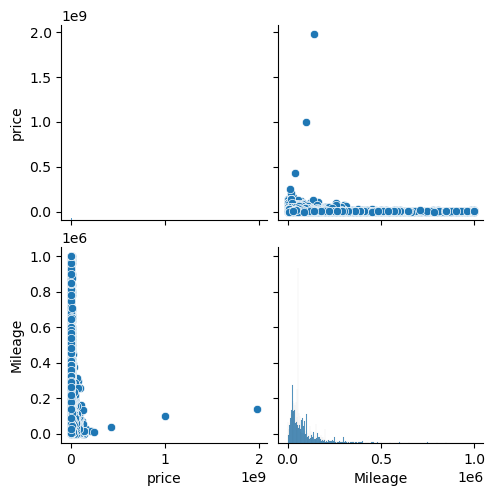

In [41]:
sns.pairplot(df3)

In [42]:
#top-right
#The histogram (or kernel density estimate) for the price variable indicates that most vehicles have lower prices, with a few extreme high values (outliers).

In [43]:
#bottom left
#The histogram for Mileage shows a similar pattern: most vehicles have lower mileage, with some unusually high values (outliers).

In [44]:
#Top-Left and Bottom-Right (Price vs. Mileage)
#The scatterplots show that Most vehicles cluster at lower values for both price and Mileage.
#There are extreme outliers with very high prices and/or very high mileage.

In [45]:
df3.isnull().sum()  #then we check all null values again

price        12
category      0
Condition     0
Brand         0
Mileage       0
Model         0
dtype: int64

In [46]:
df3=df3.dropna() # we droped null values

In [49]:
df3

,price,category,Condition,Brand,Mileage,Model
31,22000000.0,Cars,New,Ssang Yong,0.0,Rexton
1349,14500000.0,Cars,Reconditioned,Toyota,9000.0,CHR
1701,10500000.0,Cars,Reconditioned,Toyota,24000.0,Axio
1702,6500000.0,Cars,Reconditioned,Daihatsu,55000.0,Atrai Wagon
1917,11500000.0,Cars,Used,Mercedes Benz,137000.0,C180
...,...,...,...,...,...,...
258881,12985000.0,Cars,Used,Toyota,43000.0,CHR
258883,1030000.0,Cars,Used,Nissan,140000.0,March
258884,3550000.0,Cars,Used,Toyota,219000.0,Allion
258886,7250000.0,Cars,Used,Toyota,30000.0,Roomy


In [48]:
df3.columns

Index(['price', 'category', 'Condition', 'Brand', 'Mileage', 'Model'], dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df3 is already loaded with 162,821 rows

# List of columns to encode
columns_to_encode = ['category', 'Condition', 'Brand', 'Mileage', 'Model']

# Instantiate the LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to the columns in the list using .loc to avoid SettingWithCopyWarning
for column in columns_to_encode:
    df3.loc[:, column] = encoder.fit_transform(df3[column])

# Output the transformed dataframe (if needed)
# print(df3.head())


In [51]:
df3

,price,category,Condition,Brand,Mileage,Model
31,22000000.0,3,0,119,0,678
1349,14500000.0,3,1,128,972,198
1701,10500000.0,3,1,128,3504,141
1702,6500000.0,3,1,26,9493,125
1917,11500000.0,3,2,82,15028,174
...,...,...,...,...,...,...
258881,12985000.0,3,2,128,7344,198
258883,1030000.0,3,2,92,15123,546
258884,3550000.0,3,2,128,17008,112
258886,7250000.0,3,2,128,4873,687


In [54]:
# Use .loc[] to modify the 'price' column explicitly
df3.loc[:, 'price'] = scaler.fit_transform(df3[['price']])  # Scaling the target column

# Check the updated dataframe (if needed)
# print(df3.head())


In [55]:
df3.head()

,price,category,Condition,Brand,Mileage,Model
31,2.188633,3,0,119,0,678
1349,1.323831,3,1,128,972,198
1701,0.862604,3,1,128,3504,141
1702,0.401376,3,1,26,9493,125
1917,0.977911,3,2,82,15028,174


In [56]:
df3

,price,category,Condition,Brand,Mileage,Model
31,2.188633,3,0,119,0,678
1349,1.323831,3,1,128,972,198
1701,0.862604,3,1,128,3504,141
1702,0.401376,3,1,26,9493,125
1917,0.977911,3,2,82,15028,174
...,...,...,...,...,...,...
258881,1.149141,3,2,128,7344,198
258883,-0.229353,3,2,92,15123,546
258884,0.061220,3,2,128,17008,112
258886,0.487856,3,2,128,4873,687


In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162821 entries, 31 to 258887
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   price      162821 non-null  float64
 1   category   162821 non-null  int64  
 2   Condition  162821 non-null  int64  
 3   Brand      162821 non-null  int64  
 4   Mileage    162821 non-null  int64  
 5   Model      162821 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 8.7 MB


In [58]:
df3.describe()

,price,category,Condition,Brand,Mileage,Model
count,1.628210e+05,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000
mean,-6.982320e-19,4.937410,1.952746,71.190786,9420.141917,482.517108
std,1.000003e+00,2.166502,0.280124,46.623784,4882.807773,222.683664
min,-3.481191e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.192925e-01,3.000000,2.000000,26.000000,5473.000000,292.000000
50%,-2.685574e-01,6.000000,2.000000,73.000000,9493.000000,579.000000
75%,4.219474e-02,6.000000,2.000000,122.000000,13424.000000,637.000000
max,2.279596e+02,9.000000,2.000000,141.000000,19337.000000,925.000000


In [59]:
df3.columns

Index(['price', 'category', 'Condition', 'Brand', 'Mileage', 'Model'], dtype='object')

In [60]:
import pandas as pd


# Select the relevant columns for correlation analysis
df_subset = df3[['price', 'category', 'Condition', 'Brand', 'Mileage', 'Model']]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

# Display the correlation matrix
print(correlation_matrix)


              price  category  Condition     Brand   Mileage     Model
price      1.000000 -0.159119   0.004096  0.100729  0.061881 -0.017988
category  -0.159119  1.000000   0.120342 -0.251661 -0.189082 -0.060442
Condition  0.004096  0.120342   1.000000 -0.037850  0.127862 -0.021364
Brand      0.100729 -0.251661  -0.037850  1.000000  0.177769 -0.028526
Mileage    0.061881 -0.189082   0.127862  0.177769  1.000000 -0.013293
Model     -0.017988 -0.060442  -0.021364 -0.028526 -0.013293  1.000000


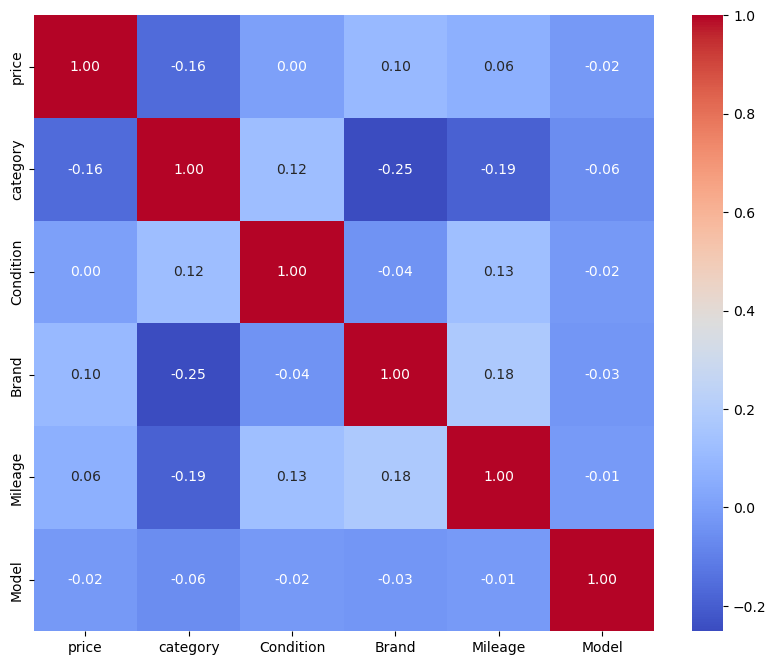

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select the relevant columns for correlation analysis
df_subset = df3[['price', 'category', 'Condition', 'Brand', 'Mileage', 'Model']]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Display the heatmap
plt.show()


In [62]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Select the relevant columns for feature selection
X = df3[['category', 'Condition', 'Brand', 'Mileage', 'Model']]  # Independent variables
y = df3['price']  # Target variable

# Initialize the model (Linear Regression in this case)
model = LinearRegression()

# Apply RFE for feature selection
rfe = RFE(model, n_features_to_select=3)  # Select the top 3 features (can be adjusted)
X_rfe = rfe.fit_transform(X, y)

# Display the features selected by RFE
selected_features_rfe = X.columns[rfe.support_]
print("Features selected by RFE:", selected_features_rfe)


Features selected by RFE: Index(['category', 'Condition', 'Brand'], dtype='object')


In [63]:
#model training
x=df3.iloc[:,1:]
y=df3.iloc[:,0] # we separated our target veriable and all data

In [64]:
y

31        2.188633
1349      1.323831
1701      0.862604
1702      0.401376
1917      0.977911
            ...   
258881    1.149141
258883   -0.229353
258884    0.061220
258886    0.487856
258887   -0.332553
Name: price, Length: 162821, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split   # imported train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)  # we splited data 

In [ ]:
#linear regression

In [67]:
from sklearn.linear_model import LinearRegression  # first we are going to apply multiple regression so we imported LinearRegression

In [68]:
regressor=LinearRegression()   

In [69]:
modd=regressor.fit(x_train,y_train)  # trained our model on trained data

In [70]:
y_pred=modd.predict(x_test) # predicted our data 

In [73]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [74]:
mean_absolute_error(y_pred,y_test)

0.34645291152843694

In [75]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
d_regressor=DecisionTreeRegressor()       # now we are going to apply Decision tree

In [76]:
model=d_regressor.fit(x_train,y_train)  # trained our model

In [77]:
y_pred=model.predict(x_test)   # calculated predicted values

In [78]:
print(f"Accuracy : {r2_score(y_pred,y_test)}")  

Accuracy : 0.7787496285770441


In [79]:
mse = mean_squared_error(y_test, y_pred)
print(f"Decison tree Mean Squared Error : {mse}")

Decison tree Mean Squared Error : 0.12602641479611798


In [80]:
mse = mean_squared_error(y_test, y_pred)
print(f"Decison tree Mean Squared Error : {mse}")

Decison tree Mean Squared Error : 0.12602641479611798


In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
regressor = RandomForestRegressor(n_estimators=20, random_state=42)

In [83]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [84]:
y_pred= regressor.predict(x_test)

In [85]:
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")

Random Forest Mean Squared Error: 0.12179892467548661


In [86]:
print(f"Accuracy : {r2_score(y_pred,y_test)}")

Accuracy : 0.7830958905386876


In [87]:
df3.shape

(162821, 6)

In [88]:
df3


,price,category,Condition,Brand,Mileage,Model
31,2.188633,3,0,119,0,678
1349,1.323831,3,1,128,972,198
1701,0.862604,3,1,128,3504,141
1702,0.401376,3,1,26,9493,125
1917,0.977911,3,2,82,15028,174
...,...,...,...,...,...,...
258881,1.149141,3,2,128,7344,198
258883,-0.229353,3,2,92,15123,546
258884,0.061220,3,2,128,17008,112
258886,0.487856,3,2,128,4873,687


In [ ]:
######################################################################################

In [89]:
df4 = df3

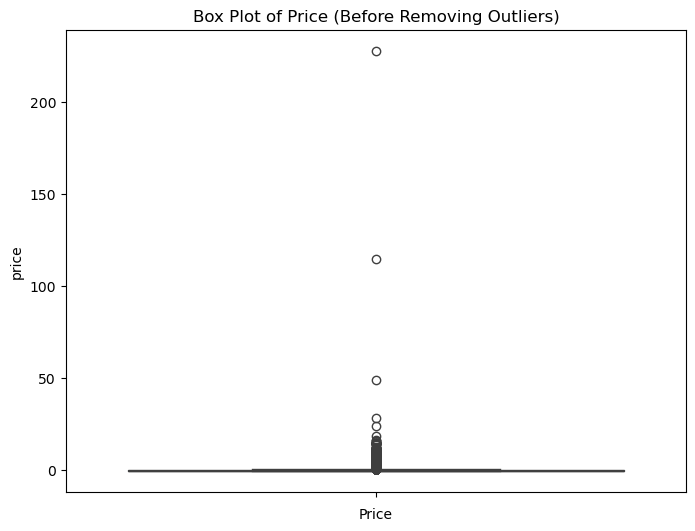

In [90]:
# Plot the box plot of the 'price' column before removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df4['price'])
plt.title('Box Plot of Price (Before Removing Outliers)')
plt.xlabel('Price')
plt.show()

In [92]:
 # Identify and remove outliers
q1 = df4['price'].quantile(0.25)
q3 = df4['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df4 = df4[(df4['price'] >= lower_bound) & (df4['price'] <= upper_bound)]

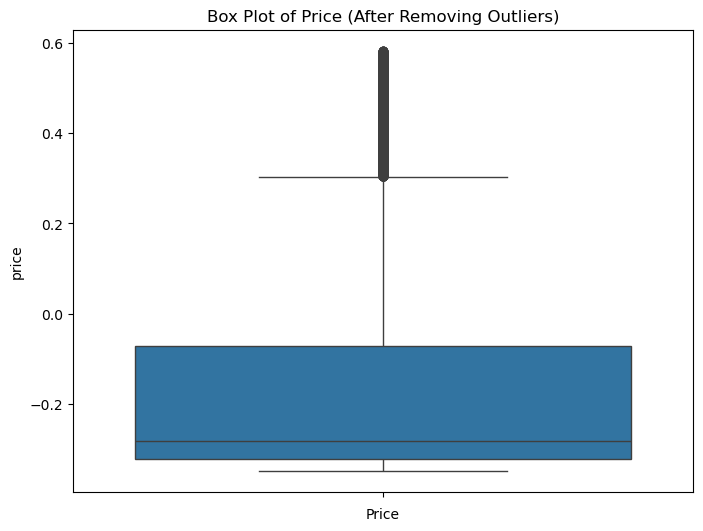

In [93]:
 # Plot the box plot of the 'price' column after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df4['price'])
plt.title('Box Plot of Price (After Removing Outliers)')
plt.xlabel('Price')
plt.show()

In [98]:
# Perform correlation analysis on numeric columns
num_cols = df4.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df4[num_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
              price  category  Condition     Brand   Mileage     Model
price      1.000000 -0.190922   0.035928  0.342125  0.404456 -0.027256
category  -0.190922  1.000000   0.128900 -0.277827 -0.215696 -0.074117
Condition  0.035928  0.128900   1.000000 -0.043773  0.122616 -0.021459
Brand      0.342125 -0.277827  -0.043773  1.000000  0.168104 -0.032284
Mileage    0.404456 -0.215696   0.122616  0.168104  1.000000 -0.023028
Model     -0.027256 -0.074117  -0.021459 -0.032284 -0.023028  1.000000


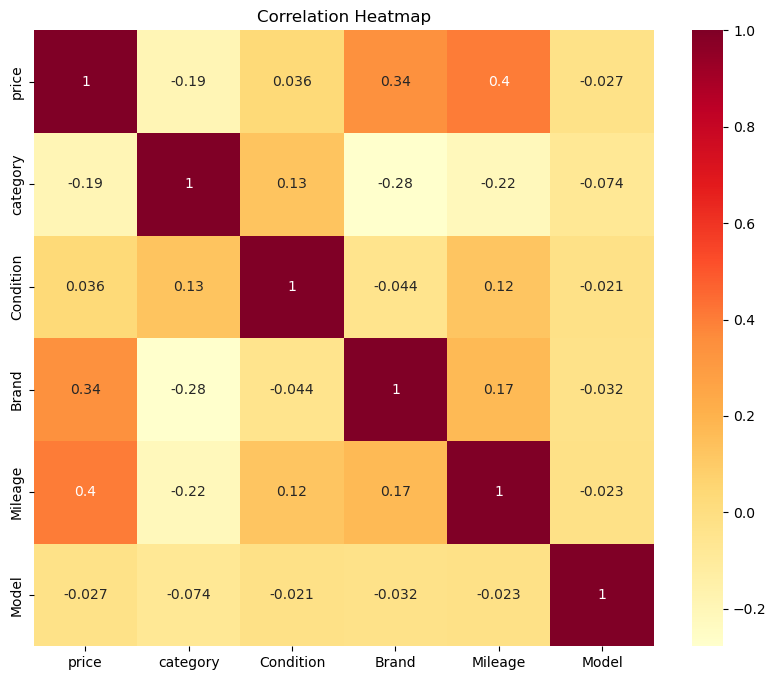

In [99]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.show()

In [101]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [102]:
# Train different regression models
models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Random Forest Regressor': RandomForestRegressor()
}
    
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

Linear Regression - RMSE: 0.71, MAE: 0.35, R²: 0.05
Ridge Regression - RMSE: 0.71, MAE: 0.35, R²: 0.05
Lasso Regression - RMSE: 0.72, MAE: 0.36, R²: 0.02
Random Forest Regressor - RMSE: 0.32, MAE: 0.08, R²: 0.80
